<h1 align=center> Performing Bivariate Analysis

## About the dataset 
The "Iris" dataset is one of the most common data sets used in statistics courses and tutorial. This data set consists of measurement samples taken from species of the Iris variety. For each flower (individual), four features (variables) were measured:

* __petal length__
* __petal width__
* __sepal length__
* __sepal width__

The fifth variable is __the species__ (of which there are three: __Setosa__, __Versicolor__ and __Virginica__)

The original data set has been modified, some values have been deleted, resulting in some missing attributes. Other values have been modified.
> _**The goal of this activity is not to find exact values, but to approximate them, using the methods of bivariate analysis**_

## Load and explore the data 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = pd.read_csv("./Datasets/iris_dataset.csv")
iris.head()

,id,sepal_length,sepal_width,petal_length,petal_width,species
0,1,5.138728,3.470118,1.441015,1.094873,setosa
1,2,4.849873,3.034931,1.414931,0.968687,setosa
2,3,4.715843,3.239083,1.295309,1.006643,setosa
3,4,4.603747,NaN,1.480616,1.002344,setosa
4,5,4.988744,3.645049,1.417527,1.122947,setosa


### Identifying errors

In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            150 non-null    int64  
 1   sepal_length  150 non-null    float64
 2   sepal_width   147 non-null    float64
 3   petal_length  150 non-null    float64
 4   petal_width   149 non-null    float64
 5   species       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Calculate measures of central tendency and value spread in the data

In [4]:
iris.describe(include='all')

,id,sepal_length,sepal_width,petal_length,petal_width,species
count,150.000000,150.000000,147.000000,150.000000,149.000000,150
unique,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,setosa
freq,NaN,NaN,NaN,NaN,NaN,50
mean,75.500000,5.837808,3.052765,3.754958,1.961671,NaN
std,43.445368,0.829649,0.441390,1.764346,0.730604,NaN
min,1.000000,4.270281,2.025099,1.012829,0.814850,NaN
25%,38.250000,5.112737,2.753251,1.551973,1.180657,NaN
50%,75.500000,5.765678,3.011189,4.342197,2.038432,NaN
75%,112.750000,6.411706,3.330501,5.078362,2.563017,NaN


### Visualize the data

iris : 150 individuals, iris_dna : 146 individuals


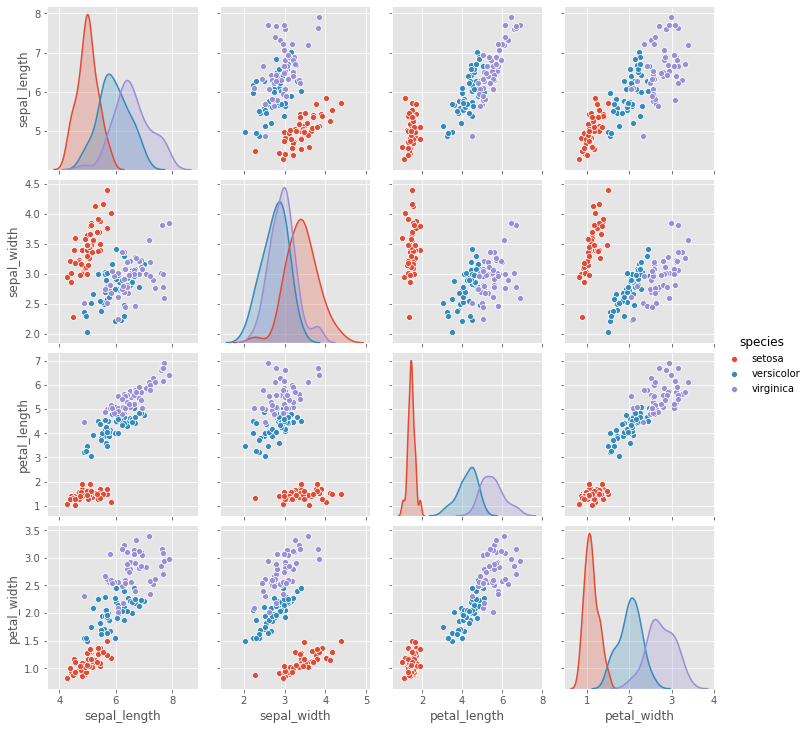

In [5]:
# Delete the identifiers
del iris["id"]
# Delete individuals with at least one missing value
iris_dna = iris.dropna(axis=0, how='any')
print("iris : {} individuals, iris_dna : {} individuals".format(len(iris),len(iris_dna)))

plt.style.use('ggplot')
# Show dispersion diagrams
sns.pairplot(iris_dna,hue="species")
plt.show()

***

After a first check, we can confirm that the problem we are addressing here is the missing values of **sepal width** and **petal width** in the dataset

***

## Understand the data using the methods of bivariate analysis 
### Petal width
As we can see from the plot above, the **petal width** has an obvious linear relationship with both **sepal length** and **petal length**. They both seem like a good predictors.

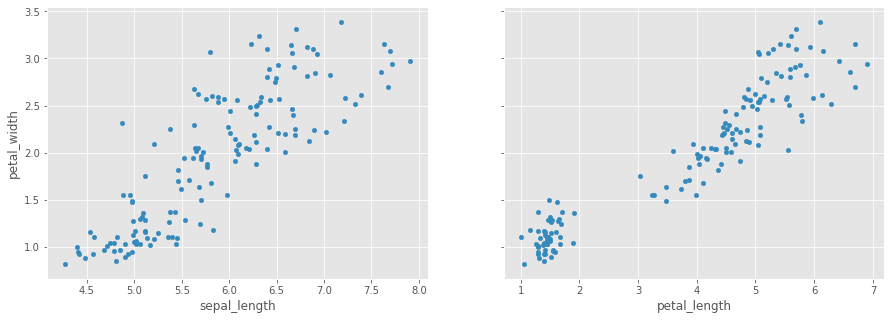

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(15,5))
iris_dna.plot('sepal_length', 'petal_width', kind='scatter', ax=ax1)
iris_dna.plot('petal_length', 'petal_width', kind='scatter', ax=ax2)

Let's look at the correlation values

In [7]:
iris_dna.corr()['petal_width']

sepal_length    0.839440
sepal_width    -0.247971
petal_length    0.941882
petal_width     1.000000
Name: petal_width, dtype: float64

> The **petal width** has a strong linear relationship with the **petal length**, with a coefficient of 0.94. This large coefficient is graphically represented by points clustered tightly around a straight line.

### Sepal width
Let's look at the correlation of the sepal width with the other variables.

In [8]:
iris_dna.corr()['sepal_width']

sepal_length   -0.125099
sepal_width     1.000000
petal_length   -0.440537
petal_width    -0.247971
Name: sepal_width, dtype: float64

The **sepal width** variable has a weak relationship with **sepal length** and **petal width**, and a moderate relationship with **petal length**, and this is not enough to considere any of them as a good predictor.

After a second look at the dispersion diagrams, we see that when we separate the sample by species, the linearity between **sepal width** and **petal width** is strong.

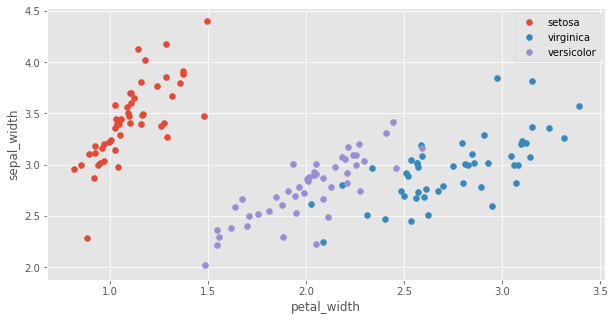

In [9]:
species = ["setosa", "virginica", "versicolor"]
fig = plt.figure(figsize=(10, 5))
for specie in species :
    data = iris_dna[iris_dna["species"] == specie]
    plt.scatter('petal_width','sepal_width', data=data)
plt.legend(labels=species)
plt.xlabel('petal_width')
plt.ylabel('sepal_width')
plt.show()

Let's confirm that by lloking the correlation matrices

In [10]:
iris_setosa = iris_dna[iris_dna["species"] == "setosa"]
print('-- Setosa')
print(iris_setosa.corr()['sepal_width'])

iris_virginica = iris_dna[iris_dna["species"] == "virginica"]
print('\n-- Virginica')
print(iris_virginica.corr()['sepal_width'])

iris_versicolor = iris_dna[iris_dna["species"] == "versicolor"]
print('\n-- Versicolor')
print(iris_versicolor.corr()['sepal_width'])

-- Setosa
sepal_length    0.742250
sepal_width     1.000000
petal_length    0.216299
petal_width     0.753135
Name: sepal_width, dtype: float64

-- Virginica
sepal_length    0.458958
sepal_width     1.000000
petal_length    0.391207
petal_width     0.685077
Name: sepal_width, dtype: float64

-- Versicolor
sepal_length    0.529154
sepal_width     1.000000
petal_length    0.567595
petal_width     0.825053
Name: sepal_width, dtype: float64


> _**Now we can approve that the petal width is a good predictor of the sepal width**_

## Approximating the values
### Calculate the coefficients
We'll calculate the coefficients of the four linear regressions needed (using the Method of Ordinary Least Squares).

The four linear regressions correspond to each of these four cases:

**Case 1**:  X is the variable **petal_length**, and Y is the variable **petal_width**, in the **iris_dna** dataframe.

**Case 2**:  X is the variable **petal_width**, and Y is the variable **sepal_width**, in the **iris_setosa** dataframe.

**Case 3**:  X is the variable **petal_width**, and Y is the variable **sepal_width**, in the **iris_virginica** dataframe.

**Case 4**:  X is the variable **petal_width**, and Y is the variable **sepal_width**, in the **iris_versicolor** dataframe.


In [11]:
from sklearn.linear_model import LinearRegression

X = iris_dna[['petal_length']]
y = iris_dna['petal_width']
lr_dna = LinearRegression()
lr_dna.fit(X, y)
print('Case 1: Y = {:.3f}*X + {:.3f}'.format(lr_dna.coef_[0], lr_dna.intercept_))

Case 1: Y = 0.386*X + 0.509


In [12]:
X = iris_setosa[['petal_width']]
y = iris_setosa['sepal_width']
lr_setosa = LinearRegression()
lr_setosa.fit(X, y)
print('Case 2: Y = {:.3f}*X + {:.3f}'.format(lr_setosa.coef_[0], lr_setosa.intercept_))

Case 2: Y = 1.788*X + 1.459


In [13]:
X = iris_virginica[['petal_width']]
y = iris_virginica['sepal_width']
lr_virginica = LinearRegression()
lr_virginica.fit(X, y)
print('Case 3: Y = {:.3f}*X + {:.3f}'.format(lr_virginica.coef_[0], lr_virginica.intercept_))

Case 3: Y = 0.699*X + 1.038


In [14]:
X = iris_versicolor[['petal_width']]
y = iris_versicolor['sepal_width']
lr_versicolor = LinearRegression()
lr_versicolor.fit(X, y)
print('Case 4: Y = {:.3f}*X + {:.3f}'.format(lr_versicolor.coef_[0], lr_versicolor.intercept_))

Case 4: Y = 0.974*X + 0.809


### Values imputation
Assuming that one individual never has more than one missing value.

In [15]:
# prepare the coefficients for the calculation
cases = {'case 1': lr_dna, 'case 2': lr_setosa, 'case 3': lr_virginica, 'case 4': lr_versicolor}
coeffs = dict()

for case, model in cases.items():
    coeffs[case] = {'a': round(model.coef_[0], 3), 'b': round(model.intercept_, 3)}
coeffs

{'case 1': {'a': 0.386, 'b': 0.509},
 'case 2': {'a': 1.788, 'b': 1.459},
 'case 3': {'a': 0.699, 'b': 1.038},
 'case 4': {'a': 0.974, 'b': 0.809}}

In [16]:
modified_lines = []

for (i,individual) in iris.iterrows(): # for every individual of Iris,...
    if pd.isnull(individual["petal_width"]): #... we test if individual["petal_width"] is null.
        a = coeffs["case 1"]['a']
        b = coeffs["case 1"]['b']
        X = individual["petal_length"]
        Y = a*X + b
        iris.loc[i,"petal_width"] = Y # we replace the missing value by Y
        modified_lines.append(i)
        print("we filled petal_width with {} based on petal_length = {}".format(Y,X))
        
    if pd.isnull(individual["sepal_width"]):
        X = individual["petal_width"]
        species = individual["species"]
        # the missing value is replace based on the species
        if species == 'setosa' :
            a = coeffs["case 2"]['a']
            b = coeffs["case 2"]['b']
        elif species == 'virginica' :
            a = coeffs["case 3"]['a']
            b = coeffs["case 3"]['b']
        else :
            a = coeffs["case 4"]['a']
            b = coeffs["case 4"]['b']
        Y = a*X + b
        iris.loc[i,"sepal_width"] = Y
        modified_lines.append(i)
        print("We filled sepal_width with {} based on the species: {} and petal_width = {}".format(Y,species,X))
print('**'*20)        
print(iris.loc[modified_lines])

We filled sepal_width with 3.2511902989271277 based on the species: setosa and petal_width = 1.0023435676326218
we filled petal_width with 2.0637454592019826 based on petal_length = 4.027837977207209
We filled sepal_width with 3.0101955089283963 based on the species: versicolor and petal_width = 2.259954321281721
We filled sepal_width with 3.3599888073140196 based on the species: virginica and petal_width = 3.3218723995908728
****************************************
     sepal_length  sepal_width  petal_length  petal_width     species
3        4.603747     3.251190      1.480616     1.002344      setosa
53       5.442775     2.340928      4.027838     2.063745  versicolor
61       5.879497     3.010196      4.181942     2.259954  versicolor
100      6.230628     3.359989      6.001908     3.321872   virginica
